### Santander Customer Transaction Prediction 
     
     
### - Prepared By Soumee Ghosh(2211444)

### Problem Description
At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

### Dataset Description

You are provided with an anonymized dataset containing numeric feature variables, the binary target column, and a string ID_code column.

The task is to predict the value of target column in the test set.

### Importing the necessary libraries

1. Data Wrangling libraries: 
 * `numpy` : Numpy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays
 * `pandas`: Pandas is an open-source library that is built on top of NumPy library. It is a Python package that offers various data structures and operations for manipulating numerical data and time series. It is mainly popular for importing and analyzing data much easier. Pandas is fast and it has high-performance & productivity for users.
 
2. data visualization library: 
 * `matplotlib`:Matplotlib is a low level graph plotting library in python that serves as a visualization utility.
 * `seaborn`: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 
 
 
3. data  Pre-processing Libraries: 
 Using the sciit learn package `MinMaxScaler` and `StandardScaler` are imported which will be used for sclaing the data. The `train_test_split` is used for dividing te data into training, validation and test set for model building . In case of imbalanced dataset `stratifiedKFold` can be used. 
 * `Stratified K fold` : It provides train/test indices to split data in train/test sets.This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.
 
 * `RandomizedsearchCv`: Randomized search on hyper parameters.RandomizedSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.

In contrast to `GridSearchCV`, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.
If all parameters are presented as a list, sampling without replacement is performed. If at least one parameter is given as a distribution, sampling with replacement is used. It is highly recommended to use continuous distributions for continuous parameters.

In [28]:
#Data Wrangling Libraries
import numpy as np
import pandas as pd

#data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

#Data Preprocessing Libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.model_selection import cross_val_score

#Machine Learning Libraries
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import auc, roc_curve,roc_auc_score

### Loading the dataset

using `read_csv` we try to read the data into a pandas dataframe.

`.head()` gives the first 5 observations in the dataset.

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


### Checking the shape of the dataframe

In [3]:
train.shape

(200000, 202)

#### There are 200000 rows and 202 columns

### Checking the info of the dataset using `.info()` method

The `info()` method prints information about the DataFrame.The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


### Checking the statistical description using `.describe()` method.

The `.describe()` method returns description of the data in the DataFrame.

If the DataFrame contains numerical data, the description contains these information for each column:

count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value.

In [5]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


### Checking for presence of null values

`.isnull()` is used for checking the presence of null values and `.sort_values` is used for sorting the null values

In [6]:
train.isnull().sum().sort_values()

ID_code    0
var_126    0
var_127    0
var_128    0
var_129    0
          ..
var_69     0
var_70     0
var_71     0
var_61     0
var_199    0
Length: 202, dtype: int64

In [7]:
test.isnull().sum().sort_values()

ID_code    0
var_126    0
var_127    0
var_128    0
var_129    0
          ..
var_69     0
var_70     0
var_71     0
var_61     0
var_199    0
Length: 201, dtype: int64

### So we observe that there are no null values present in the training as well as testing dataset

#### Using `.drop_duplicates` we drop if there is presence of any duplicate value

In [9]:
train.drop_duplicates(inplace=True)

In [10]:
test.drop_duplicates(inplace=True)

In [11]:
train.head(3)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965


#### `.drop()` is used for dropping the ID_code column 

In [12]:
train.drop("ID_code",axis=1,inplace=True)

In [13]:
train.head(2)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [14]:
test.head(2)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760


In [15]:
test.drop("ID_code",axis=1,inplace=True)

#### Now using `.value_counts()`we check the distribution of the target column of the dataset

In [16]:
train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

#### Here we plot the distribution of the target column using a `pie chart` 

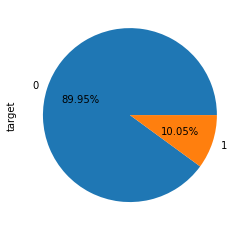

In [17]:
train.target.value_counts().plot(kind="pie",labels=["0","1"],autopct="%.2f%%")

* The target column is imbalanced, 
* So we need to balance it either using undersampling or oversampling or use stratified k fold cross validation

### Using `.skew()`  method we check the skewness of all the columns of the taining dataset

In [18]:
train.skew()

target     2.657642
var_0      0.235639
var_1      0.053115
var_2      0.260313
var_3     -0.003548
             ...   
var_195    0.124048
var_196   -0.032527
var_197   -0.031094
var_198   -0.170156
var_199   -0.164349
Length: 201, dtype: float64

### Here we are using `undersampling`.

`Undersampling` is a common technique used to address the issue of imbalanced classes in machine learning. When dealing with imbalanced datasets, where one class has significantly fewer instances than the other(s), the model tends to be biased towards the majority class, leading to poor performance on the minority class. Undersampling aims to alleviate this problem by reducing thenumber of instances in the majority class to balance the class distribution.

In [19]:
from sklearn.utils import resample

target_0 = train[train.target == 0]
target_1 = train[train.target == 1]

target_0_downsampled = resample(target_0, replace = False, n_samples = len(target_1), random_state = 13)

In [20]:
target_0_downsampled.shape

(20098, 201)

In [22]:
target_1.shape

(20098, 201)

In [23]:
downsampled = pd.concat([target_0_downsampled, target_1])
downsampled.target.value_counts()

1    20098
0    20098
Name: target, dtype: int64

In [24]:
downsampled.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
137312,0,12.8349,-1.8347,9.7758,6.3049,12.2757,-9.9022,6.8161,15.2060,3.3815,...,10.1672,6.2511,4.2107,12.0961,20.7002,0.9548,-5.4146,9.8854,10.4776,-12.2150
16192,0,12.7580,2.5818,9.6942,5.0552,9.7792,-0.0449,7.4387,22.7764,1.5262,...,3.2251,10.1442,1.3667,6.5912,19.6133,-0.4250,1.9741,9.9844,19.0760,13.4439
22656,0,7.1304,-8.7134,11.5949,8.7937,12.5311,-3.4522,6.1531,17.0418,1.8732,...,-3.9856,9.8221,1.8566,3.6718,15.3979,-0.2740,4.8341,9.0588,16.6492,-8.0587
63767,0,14.6030,-0.1394,12.5245,6.8083,12.7765,-16.7583,5.5475,10.9437,-5.0456,...,8.9139,3.1889,2.7168,0.0079,16.0791,0.8000,5.8537,7.0612,20.1470,-1.3247
48763,0,6.0822,1.7514,13.3706,6.2506,10.7307,-7.1566,6.8930,24.4839,4.8981,...,1.2336,7.4945,2.6278,6.5365,16.4109,1.5065,1.8713,10.3388,17.3387,-15.6384


### Preparing X and y

In [26]:
X = downsampled.drop(['target'], axis=1)
y = downsampled['target']

### Model Building

The `Pipeline` class in scikit-learn is a convenient tool for chaining multiple steps together in a machine leeearning workflow.It allows to encapsulate preprocessing steps,feature engineering and model training into a single object.

`GridSearchCv` is a utility provided by scikit learn that enables systematic parameter tuning for ML models.IT performs an exhaustive search over a predefined set of hyperparameter values, evaluating the model's performance using cross-vaidation.

Here we are using `Logistic Regression` as our model. According to the steps defined in the pipeline , the model will first go through scaling using standard scaler and then Logistic Regression will be performed on the model.

The data is then split into traininga nd testing set and Grid sEarch is performed . Thereafter using `.fit()` method the training dtaa is fit and finally using `.best_score_` the best cross validation score is calculated.`.best_params_`gives the best parameter value .

#### MODEL 1: Logistic Regression

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.7807252611147343 
 {'logreg__C': 0.001}


 Similary here we follow the similar steps and perform `KNeighborsClassifier`.It is a classification algorithm provided by scikit-learn that belongs to the family of instance-based learning  or lazy learning algorithms.It is a non-parametric algorithm, which means it does not make any assumptions about the underlying distribution of the data.Instead, it learns from the training  data by storing all of the training samples in memory and uses them to make predictions on new unseen data

#### MODEL 2: K Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# classifier.fit(X_train, y_train)

steps = [("scaler", StandardScaler()),
         ("knn", KNeighborsClassifier())]
pipeline = Pipeline(steps)

parameters = {"knn__n_neighbors": range(1, 10)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)
# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.5626943371696951 
 {'knn__n_neighbors': 3}


### MODEL 3: Random Forest Classifier

`RandomForestClassifier`:The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then it collects the votes from different decision trees to decide the final prediction.

In [31]:
from sklearn.ensemble import RandomForestClassifier

steps = [("scaler", StandardScaler()),
         ("rf", RandomForestClassifier(criterion = 'entropy'))]
pipeline = Pipeline(steps)

parameters = {"rf__n_estimators": range(1, 15)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.664013086487946 
 {'rf__n_estimators': 13}


### MODEL 4: Gaussian Naive Bayes

`Naive Bayes` classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.


 `confusion matrix`: A confusion matrix, also known as an error matrix, is a powerful tool used to evaluate the performance of classification models. The matrix is a tabular format that shows predicted values against their actual values.This allows us to understand whether the model is performing well or not.The rows represent the instances of the actual class, and
The columns represent the instances of the predicted class.
a confusion matrix is made up of four main components:

   * True Positives (TP): instances where the model correctly predicted the positive class.
   * True Negatives (TN): instances where the model correctly predicted the negative class.
   * False Positives (FP): instances where the model incorrectly predicted the positive class (also known as Type I error).
   * False Negatives (FN): instances where the model incorrectly predicted the negative class (also known as Type II error).
   
   
 `accuracy score`: One of the widely used metrics that computes the performance of classification models is accuracy. The percentage of labels that our model successfully predicted is represented by accuracy. For instance, if our model accurately classified 80 of 100 labels, its accuracy would be 0.80.

In [32]:
from sklearn.naive_bayes import GaussianNB

steps = [("scaler", StandardScaler()),
         ("gnb", GaussianNB())]
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3258  772]
 [ 790 3220]]


0.8057213930348258

### After comparing all the models we find that Gaussian Naive Bayes gives the best solution , so we predict the final model using Gaussian Naive Bayes algrithm

### Final Model & Prediction

In [37]:
steps = [("scaler", StandardScaler()),
         ("gnb", GaussianNB())]
pipeline = Pipeline(steps)

pipeline.fit(X, y)

y_pred = pipeline.predict(test)

In [39]:
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [40]:
output=pd.DataFrame({'ID_code': test.ID_code,
                   'target': y_pred})
output.to_csv('submission.csv', index=False)

print("The submission was successfully saved!")